In [1]:
import numpy as np

from tqdm.notebook import tqdm


In [2]:
from queue import PriorityQueue


In [3]:
with open("input_day_16.txt") as file:
    
    text = file.read()



In [4]:
test = False
if test:

    text = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""
    

In [5]:
lines = text.strip().split("\n")

adjacencies = {}
flow_rates = {}
for l in lines:
    
    words = l.split()
    
    xs = words[9:]
    adjacencies[words[1]] = [x.split(",")[0] for x in xs]
    
    flow_rates[words[1]] = int(words[4].split("=")[1].split(";")[0])
    


In [6]:
all_rooms = list(flow_rates.keys())
all_rooms_set = set(all_rooms)

all_flow_rooms = []
for k, v in flow_rates.items():
    if v > 0:
        all_flow_rooms.append(k)


In [7]:
total_possible_flow_rate = np.sum(list(flow_rates.values()))
print(total_possible_flow_rate)


227


In [8]:
# 1650 before 12_500_000

# 1716 before 7_000_000

In [9]:
expanded_adjacencies = {}
for i1, r1 in enumerate(all_rooms):
    for i2, r2 in enumerate(all_rooms):
        if i1 >= i2:
            continue
        
        if r2 in adjacencies[r1]:
            expanded_adjacencies[tuple(sorted([r1, r2]))] = 1            
            

for update_round in range(7):
    print(len(expanded_adjacencies))
    next_expanded_adjacencies = expanded_adjacencies.copy()
    for e1 in expanded_adjacencies:
        for e2 in expanded_adjacencies:
            
            for end in e1:
                if end in e2: # these butt up against each other, can combine them
                    new_set = set(e1).union(set(e2))
                    new_set.remove(end)
                    new_tuple = tuple(sorted(list(new_set)))
                    if len(new_tuple) == 1: # looped back on itself
                        continue
                    
                    if new_tuple in expanded_adjacencies: # update existing value if it's smaller
                        if expanded_adjacencies[e1] + expanded_adjacencies[e2] < expanded_adjacencies[new_tuple]:
                            next_expanded_adjacencies[new_tuple] = expanded_adjacencies[e1] + expanded_adjacencies[e2]
                    else:
                        next_expanded_adjacencies[new_tuple] = expanded_adjacencies[e1] + expanded_adjacencies[e2]

    expanded_adjacencies = next_expanded_adjacencies
    
    
num_rooms = len(all_rooms)
print(len(expanded_adjacencies), num_rooms * (num_rooms - 1) // 2)
#expanded_adjacencies

71
201
616
1273
1708
1711
1711
1711 1711


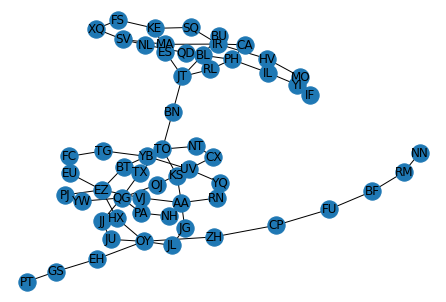

In [10]:
import networkx as nx

import matplotlib.pyplot as plt

g = nx.Graph()
for k, v in adjacencies.items():
    for o in v:
        g.add_edge(k, o)
nx.draw(g, with_labels = True)


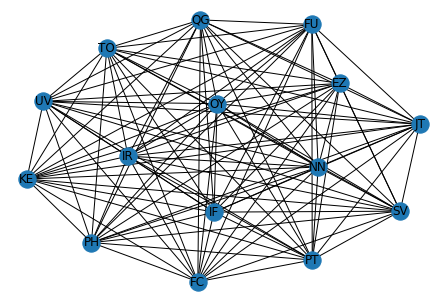

In [11]:
g = nx.Graph()
for k, v in expanded_adjacencies.items():
    if k[0] in all_flow_rooms and k[1] in all_flow_rooms:
        g.add_edge(k[0], k[1])
nx.draw(g, with_labels = True)

In [12]:
print(all_flow_rooms)
print(len(all_flow_rooms))


['JT', 'PH', 'IR', 'SV', 'UV', 'EZ', 'KE', 'OY', 'NN', 'FU', 'PT', 'IF', 'TO', 'FC', 'QG']
15


In [13]:
def total_flowed_with_no_more_steps(current_state):

    you_rooms, elephant_rooms, remaining_rooms, you_budget, elephant_budget = current_state

    current_flowed = 0
    
    #temp_you_total = 0
    
    current_you_rate = 0
    for i in range(len(you_rooms) - 1):
        num_steps = expanded_adjacencies[tuple(sorted([you_rooms[i], you_rooms[i+1]]))]
        current_flowed += current_you_rate * (num_steps + 1)
        current_you_rate += flow_rates[you_rooms[i+1]]
        #print("you cumulative rate", you_rooms[i+1], current_you_rate)

    current_flowed += current_you_rate * you_budget
    #temp_you_total += current_you_rate * you_budget
    
    
    current_elephant_rate = 0
    for i in range(len(elephant_rooms) - 1):
        num_steps = expanded_adjacencies[tuple(sorted([elephant_rooms[i], elephant_rooms[i+1]]))]
        current_flowed += current_elephant_rate * (num_steps + 1)
        current_elephant_rate += flow_rates[elephant_rooms[i+1]]

    current_flowed += current_elephant_rate * elephant_budget
    
    return current_flowed
    

In [14]:
# you walked AA->II->JJ and activated JJ
#total_flowed_with_no_more_steps((['AA', 'JJ', 'BB', 'CC'], ['AA', 'DD', 'HH', 'EE'], [], 17, 15))

In [15]:

q = PriorityQueue()

you_rooms = ["AA"]
elephant_rooms = ["AA"]
remaining_rooms = all_flow_rooms
you_rate = 0
elephant_rate = 0
you_budget = 26
elephant_budget = 26

# budgets refer to the amount remaining after activating the last room

current_state = (you_rooms, elephant_rooms, remaining_rooms, you_budget, elephant_budget)

q.put((-total_flowed_with_no_more_steps(current_state), current_state))
    
max_possible_total_flow = 0
num_states_considered = 0

prev_considered_state_hashes = set()

while not q.empty():
    
    #print("new qget", q.qsize())

        
    tup = q.get()
    
    total_no_more_steps = -tup[0]
    current_state = tup[1]
        
    you_rooms, elephant_rooms, remaining_rooms, you_budget, elephant_budget = current_state
    
    current_hash = hash((tuple(you_rooms), tuple(elephant_rooms)))
    
    if current_hash in prev_considered_state_hashes:
        continue
    else:
        prev_considered_state_hashes.add(current_hash)
        
        
    max_possible_total_flow = max(max_possible_total_flow, total_no_more_steps)
    
    
    if num_states_considered % 500000 == 0:
        print(num_states_considered, max_possible_total_flow)
        #print(current_state)
        
    num_states_considered += 1
    
    
    for person in [1, 2]:
        
        #print("person", person)
        
        if person == 1: # you move
            
            for new_room in remaining_rooms:
                
                num_steps = expanded_adjacencies[tuple(sorted([you_rooms[-1], new_room]))]
                
                new_you_budget = you_budget - num_steps - 1
                
                if new_you_budget <= 0:
                    continue
                
                new_you_rooms = you_rooms + [new_room]
                
                new_remaining_rooms = remaining_rooms.copy()
                new_remaining_rooms.remove(new_room)
                                
                new_state = (
                    new_you_rooms, elephant_rooms, 
                    new_remaining_rooms, 
                    new_you_budget, elephant_budget
                )
                
                #print("adding", q.qsize())
                
                q.put((-total_flowed_with_no_more_steps(new_state), new_state))
                
                #print("done adding", q.qsize())
                
        if person == 2: # elephant moves
            
            for new_room in remaining_rooms:
                
                num_steps = expanded_adjacencies[tuple(sorted([elephant_rooms[-1], new_room]))]
                
                new_elephant_budget = elephant_budget - num_steps - 1
                
                if new_elephant_budget <= 0:
                    continue
                
                new_elephant_rooms = elephant_rooms + [new_room]
                
                new_remaining_rooms = remaining_rooms.copy()
                new_remaining_rooms.remove(new_room)
                                
                new_state = (
                    you_rooms, new_elephant_rooms, 
                    new_remaining_rooms, 
                    you_budget, new_elephant_budget
                )
                
                q.put((-total_flowed_with_no_more_steps(new_state), new_state))
                
print("exhausted all possibilities")
print(max_possible_total_flow)
        

0 0
500000 2201
1000000 2266
1500000 2266
2000000 2266
2500000 2266
3000000 2266
3500000 2329
4000000 2329
4500000 2329
5000000 2329
5500000 2329
6000000 2329
6500000 2329
7000000 2329
7500000 2329
8000000 2329
8500000 2329
9000000 2329
9500000 2329
10000000 2329
10500000 2329
11000000 2329
11500000 2329
12000000 2329
12500000 2329
13000000 2329
13500000 2329
14000000 2329
14500000 2329
15000000 2329
15500000 2329
16000000 2329
16500000 2329
17000000 2329
17500000 2329
18000000 2329
18500000 2329
19000000 2410
19500000 2410
20000000 2410
20500000 2504
21000000 2504
21500000 2504
22000000 2504
22500000 2504
23000000 2504
23500000 2504
24000000 2504
24500000 2504
25000000 2504
25500000 2504
26000000 2504
26500000 2504
27000000 2504
27500000 2504
28000000 2504
28500000 2504
29000000 2504
29500000 2504
30000000 2504
30500000 2504
31000000 2504
31500000 2504
32000000 2504
32500000 2504
33000000 2504
33500000 2504
34000000 2504
34500000 2504
35000000 2504
35500000 2504
36000000 2504


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/lmh227/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-249d5a262233>", line 80, in <module>
    q.put((-total_flowed_with_no_more_steps(new_state), new_state))
  File "/Users/lmh227/opt/miniconda3/lib/python3.7/queue.py", line 151, in put
    self.not_empty.notify()
  File "/Users/lmh227/opt/miniconda3/lib/python3.7/threading.py", line 345, in notify
    if not self._is_owned():
  File "/Users/lmh227/opt/miniconda3/lib/python3.7/threading.py", line 255, in _is_owned
    def _is_owned(self):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/lmh227/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrup

TypeError: object of type 'NoneType' has no len()

In [ ]:
# 2266 after 1_000_000
# 2329 after 3_500_000 (incorrect)
# 2504 after 20_500_000


# past:
# 2330 after 13_500_000 (incorrect)
# 2387 after 52000000 (incorrect)
# 2449 after 89500000 (incorrect)

In [ ]:
p1 = False

if p1:


    from queue import PriorityQueue

    q = PriorityQueue()


    # each entry in the priority queue is the current 

    # predicted cost is negative
    #    current amount flowed 
    #    plus, current flow rate * remai
    #    plus, 0.5 * avg_remaining_flow_rate * num_remaining_minutes


    current_open_valves = []
    current_flow_rate = 0
    current_room = 'AA' # room occupied on the last turn
    rooms_since_last_valve = ['AA']
    current_amount_flowed = 0
    num_remaining_minutes = 30

    current_state = [current_open_valves, current_flow_rate, current_room, rooms_since_last_valve, current_amount_flowed, num_remaining_minutes]


    def predicted_cost(current_state):

        current_open_valves = current_state[0]
        current_flow_rate = current_state[1]
        current_room = current_state[2]
        rooms_since_last_valve = current_state[3]
        current_amount_flowed = current_state[4]
        num_remaining_minutes = current_state[5]

        return -current_amount_flowed - current_flow_rate * num_remaining_minutes



    q.put((predicted_cost(current_state), current_state)) # putting the first point with estimated cost




    max_possible_total_flow = 0

    num_states_considered = 0

    prev_considered_states = set()

    while not q.empty():

        if num_states_considered % 500000 == 0:
            print(num_states_considered)

        current_predicted_cost, current_state = q.get()

        num_states_considered += 1

        current_open_valves = current_state[0]
        current_flow_rate = current_state[1]
        current_room = current_state[2]
        rooms_since_last_valve = current_state[3]
        current_amount_flowed = current_state[4]
        num_remaining_minutes = current_state[5]

        next_amount_flowed = current_amount_flowed + current_flow_rate

        if num_remaining_minutes == 0:
            #print("finished, total flow:", current_amount_flowed)

            if current_amount_flowed > max_possible_total_flow:
                max_possible_total_flow = max(max_possible_total_flow, current_amount_flowed)
                print("new max possible flow,", max_possible_total_flow)

            continue

        if set(current_open_valves) == set(all_rooms): # nothing left to do
            next_state = [current_open_valves, 
                          current_flow_rate, 
                          current_room, 
                          rooms_since_last_valve,
                          current_amount_flowed + current_flow_rate,
                          num_remaining_minutes - 1]

            q.put((predicted_cost(next_state), next_state))
            continue

        if current_amount_flowed + total_possible_flow_rate * num_remaining_minutes <= max_possible_total_flow:
            continue # could never beat the current best

        if (tuple(current_open_valves), 
                          current_flow_rate, 
                          current_room, 
                          current_amount_flowed,
                          num_remaining_minutes) in prev_considered_states:
            continue # considered this before
        else:
            prev_considered_states.add((tuple(current_open_valves), 
                          current_flow_rate,
                          current_room, 
                          current_amount_flowed,
                          num_remaining_minutes))

        #print(current_predicted_cost, current_state)


        for choice in [0, 1]:

            if choice == 0 and flow_rates[current_room] > 0 and not (current_room in current_open_valves): # open valve

                next_open_valves = current_open_valves + [current_room]

                next_state = [next_open_valves, 
                              current_flow_rate + flow_rates[current_room], 
                              current_room,
                              [current_room],
                              current_amount_flowed + current_flow_rate,
                              num_remaining_minutes - 1]

                q.put((predicted_cost(next_state), next_state))

            if choice == 1: # move to a new room

                #print("moving")

                for next_room in adjacencies[current_room]:

                    # this part seemed to work for the real thing but break the test
                    #num_conn = 0 # number of connections to current room
                    #for prev_room in rooms_since_last_valve:
                    #    if prev_room in adjacencies[next_room]:
                    #        num_conn += 1 
                    #if num_conn > 1: # we could have gotten here earlier, this is a waste of time
                    #    continue

                    if next_room in rooms_since_last_valve: # we were just there, useless move
                        continue


                    next_state = [current_open_valves, 
                              current_flow_rate, 
                              next_room, 
                              rooms_since_last_valve + [next_room],
                              current_amount_flowed + current_flow_rate,
                              num_remaining_minutes - 1]

                    q.put((predicted_cost(next_state), next_state))

    print("exhausted all possibilities")




In [ ]:
# is wrong for some reason

"""
def generate_list_from_you_move(current_state): # these don't have the time step applied
    
    current_closed_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    traveling_wait_you = current_state[4]
    traveling_wait_elephant = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
        
    ret = []
    
    for next_valve_room in current_closed_valves: # next room to walk to
        
        if next_valve_room == current_you_room:
            continue
        
        num_steps = expanded_adjacencies[tuple(sorted([current_you_room, next_valve_room]))]
        
        if num_steps > num_remaining_minutes:
            continue
        
        ret.append([current_closed_valves, 
                    current_flow_rate, 
                    next_valve_room, current_elephant_room, 
                    num_steps - 1, traveling_wait_elephant,
                    current_amount_flowed,
                    num_remaining_minutes])
             
    return ret
                   
def generate_state_from_you_valve(current_state):
    
    current_closed_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    traveling_wait_you = current_state[4]
    traveling_wait_elephant = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    
    ret = []
    
    if flow_rates[current_you_room] > 0 and current_you_room in current_closed_valves: # open valve
        next_closed_valves = current_closed_valves.copy()
        next_closed_valves.remove(current_you_room)
        ret.append([next_closed_valves, 
                    current_flow_rate + flow_rates[current_you_room], 
                    current_you_room, current_elephant_room,
                    -1, traveling_wait_elephant,
                    current_amount_flowed,
                    num_remaining_minutes])

    return ret
    
    
def generate_list_from_elephant_move(current_state): # these don't have the time step applied
    
    current_closed_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    traveling_wait_you = current_state[4]
    traveling_wait_elephant = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
        
    ret = []
    
    for next_valve_room in current_closed_valves: # next room to walk to
        
        if next_valve_room == current_elephant_room:
            continue
        
        num_steps = expanded_adjacencies[tuple(sorted([current_elephant_room, next_valve_room]))]
        
        if num_steps > num_remaining_minutes:
            continue
        
        ret.append([current_closed_valves, 
                    current_flow_rate, 
                    current_you_room, next_valve_room,
                    traveling_wait_you, num_steps - 1,
                    current_amount_flowed,
                    num_remaining_minutes])
             
    return ret
                   
def generate_state_from_elephant_valve(current_state):
    
    current_closed_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    traveling_wait_you = current_state[4]
    traveling_wait_elephant = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]

    
    ret = []
    
    if flow_rates[current_elephant_room] > 0 and current_elephant_room in current_closed_valves: # open valve
        next_closed_valves = current_closed_valves.copy()
        next_closed_valves.remove(current_elephant_room)
        ret.append([next_closed_valves, 
                    current_flow_rate + flow_rates[current_elephant_room], 
                    current_you_room, current_elephant_room,
                    traveling_wait_you, -1,
                    current_amount_flowed,
                    num_remaining_minutes])

    return ret

expected_states = [
    [['BB', 'CC', 'DD', 'EE', 'HH', 'JJ'], 0, 'AA', 'AA', -2, -2, 0, 26], # before minute 1
    [['BB', 'CC', 'DD', 'EE', 'HH', 'JJ'], 0, 'JJ', 'DD', 1, 0, 0, 25], # II is on the way to JJ
    [['BB', 'CC', 'EE', 'HH', 'JJ'], 20, 'JJ', 'DD', 0, -1, 0, 24], # you finished moving, elephant opened DD
    [['BB', 'CC', 'EE', 'HH'], 41, 'JJ', 'HH', -1, 3, 20, 23], # you open, elephant moves to HH
    [['BB', 'CC', 'EE', 'HH'], 41, 'BB', 'HH', 2, 2, 61, 22], # you move to BB, elephant keeps moving
    [['BB', 'CC', 'EE', 'HH'], 41, 'BB', 'HH', 1, 1, 102, 21], # both keep moving
    [['BB', 'CC', 'EE', 'HH'], 41, 'BB', 'HH', 0, 0, 143, 20], # both finish moving
    [['CC', 'EE'], 76, 'BB', 'HH', -1, -1, 184, 19], # both open valves
    [['CC', 'EE'], 76, 'CC', 'EE', 0, 2, 260, 18], # both start moving
    [['EE'], 78, 'CC', 'EE', -1, 1, 336, 17], # you open CC
    [['EE'], 78, 'CC', 'EE', -3, 0, 414, 16], # you choose to do nothing, elephant continues moving
    [[], 81, 'CC', 'EE', -3, -1, 492, 15], # elephant opens EE
    [[], 81, 'CC', 'EE', -3, -3, 573, 14], # both choose to do nothing

]

q = PriorityQueue()

current_closed_valves = all_flow_rooms
current_flow_rate = 0
current_you_room = 'AA'
current_elephant_room = 'AA'
traveling_wait_you = -2
traveling_wait_elephant = -2
current_amount_flowed = 0
num_remaining_minutes = 26


current_state = [current_closed_valves,
                 current_flow_rate,
                 current_you_room, current_elephant_room, 
                 traveling_wait_you, traveling_wait_elephant, 
                 current_amount_flowed,
                 num_remaining_minutes]


def predicted_cost(current_state):
    
    current_closed_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    traveling_wait_you = current_state[4]
    traveling_wait_elephant = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    
    #ret = -current_amount_flowed
    ret = -current_amount_flowed - current_flow_rate * num_remaining_minutes
    
    if traveling_wait_you >= 0: # waiting, going to turn this on
        ret -= flow_rates[current_you_room] * (num_remaining_minutes - 1 - traveling_wait_you)
        
    if traveling_wait_elephant >= 0: # waiting, going to turn this on
        ret -= flow_rates[current_elephant_room] * (num_remaining_minutes - 1 - traveling_wait_elephant)
    
    #if traveling_wait_you > 0: # waiting, going to turn this on
    #    ret -= flow_rates[current_you_room] * (num_remaining_minutes - 1 - traveling_wait_you)
    #elif current_you_room in current_closed_valves:
    #    ret -= flow_rates[current_you_room] * (num_remaining_minutes - 1)
        
    #if traveling_wait_elephant > 0:
    #    ret -= flow_rates[current_elephant_room] * (num_remaining_minutes - traveling_wait_elephant)
    #elif current_elephant_room in current_closed_valves:
    #    ret -= flow_rates[current_elephant_room] * (num_remaining_minutes - 1)
        
    #estimated_time_to_get_rest = len(current_closed_valves) * 3    
    #ret -= (total_possible_flow_rate - current_flow_rate) * (num_remaining_minutes - estimated_time_to_get_rest)
    
    return ret



q.put((predicted_cost(current_state), current_state)) # putting the first point with estimated cost


max_possible_total_flow = 0

num_states_considered = 0

prev_considered_state_hashes = set()

while not q.empty():
    
    if num_states_considered % 500000 == 0:
        print("num considered", num_states_considered, max_possible_total_flow)
        
    #print("starting a loop")

    
    current_predicted_cost, current_state = q.get()
    #print(current_state)
    
    #if current_state in expected_states:
    #    print("found it", current_state)
    
    
    num_states_considered += 1
        
    current_closed_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    traveling_wait_you = current_state[4]
    traveling_wait_elephant = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    
    #if current_you_room == "II" and current_elephant_room == "DD" and num_remaining_minutes == 25:
    #    print("found it", predicted_cost(current_state), current_state)
    
    next_amount_flowed = current_amount_flowed + current_flow_rate
    
    if current_amount_flowed > max_possible_total_flow:
        max_possible_total_flow = max(max_possible_total_flow, current_amount_flowed)
    
    if num_remaining_minutes == 0:
        continue
        
    if ((hash((tuple(current_closed_valves), 
                      current_you_room, current_elephant_room, 
                      traveling_wait_you, traveling_wait_elephant,
                      current_amount_flowed,
                      num_remaining_minutes)) in prev_considered_state_hashes) or hash(((tuple(current_closed_valves), 
                      current_elephant_room, current_you_room, 
                      traveling_wait_elephant, traveling_wait_you,
                      current_amount_flowed,
                      num_remaining_minutes)) in prev_considered_state_hashes)):
        continue # considered this before
    else:
        prev_considered_state_hashes.add(hash((tuple(current_closed_valves), 
                      current_you_room, current_elephant_room, 
                      traveling_wait_you, traveling_wait_elephant,
                      current_amount_flowed,
                      num_remaining_minutes)))
        
    #if current_state in expected_states and num_remaining_minutes == 15:
    #    print("found it here 1", your_choices, elephant_choices)
    
    if len(current_closed_valves) == 0: # nothing left to do
        
        final_amount_flowed = current_amount_flowed + current_flow_rate * num_remaining_minutes
        
        #if current_state in expected_states and num_remaining_minutes == 15:
        #    print("found it here 2", final_amount_flowed)
        
        if final_amount_flowed > max_possible_total_flow:
            max_possible_total_flow = final_amount_flowed
            #print("new max possible flow,", max_possible_total_flow)
        continue
    
        
    if current_amount_flowed + total_possible_flow_rate * num_remaining_minutes <= max_possible_total_flow:
        continue # could never beat the current best
    
    
    if traveling_wait_you > 0: # need to wait during travel
        your_choices = [2]
    elif traveling_wait_you == -1: # just valved
        your_choices = [1, 2]
    elif traveling_wait_you == 0: # just finished moving
        your_choices = [0]
    elif traveling_wait_you == -2: # first turn
        your_choices = [0, 1] # first turn only
    elif traveling_wait_you == -3: # doing nothing
        your_choices = [2]
    else:
        print("invalid!")
        
    if traveling_wait_elephant > 0: # need to wait during travel
        elephant_choices = [2]
    elif traveling_wait_elephant == -1: # just valved
        elephant_choices = [1, 2]
    elif traveling_wait_elephant == 0: # just finished moving
        elephant_choices = [0]
    elif traveling_wait_elephant == -2: # first turn
        elephant_choices = [0, 1] # first turn only
    elif traveling_wait_elephant == -3: # doing nothing
        elephant_choices = [2]
    else:
        print("invalid!")
        
    #if current_state in expected_states and num_remaining_minutes == 15:
    #    print("found it here", your_choices, elephant_choices)
        
        
    #if current_you_room == "JJ" and current_elephant_room == "DD" and num_remaining_minutes == 25:
    #    print("found something", current_state)
    
    #if current_state in expected_states and num_remaining_minutes == 20:
    #    print("found it", current_state)
    #    print(your_choices, elephant_choices)
    
        
    for your_choice in your_choices:
        
        #print("your_choice", your_choice)
        
        if your_choice == 0: # open valve
        
            next_states = generate_state_from_you_valve(current_state)
            if next_states == []:
                continue
        
        if your_choice == 1: # move
            
            next_states = generate_list_from_you_move(current_state)
            #print("moved you", next_states)
            if next_states == []:
                continue
                                
        if your_choice == 2: # do nothing
            
            #if traveling_wait_you == -1: # you chose this
            #    next_traveling_wait_yous = [-3]
            
            if traveling_wait_you <= 0 and len(current_closed_valves) > 2: # still possible to open more, shouldn't wait
                continue
            
            next_states = [current_state]
            
        #print("next states:", next_states)
            
        for s in next_states: # iterating over the new partial states from the you move
                        
            for elephant_choice in elephant_choices:

                #print("elephant_choice", elephant_choice)

                if elephant_choice == 0: # open valve
                    
                    next_states_2 = generate_state_from_elephant_valve(s)
                    if next_states_2 == []:
                        continue

                if elephant_choice == 1: # move
                                        
                    if your_choice == 1 and len(current_closed_valves) == 1: # there's just one room left, don't need both to move
                        continue

                    next_states_2 = generate_list_from_elephant_move(s)
                    if next_states_2 == []:
                        continue

                if elephant_choice == 2: # do nothing
                    
                    #if traveling_wait_elephant == -1: # you chose this
                    #    next_traveling_wait_elephants = [-3]
                    
                    if traveling_wait_elephant <= 0 and len(s[0]) > 2: # still possible to open more, shouldn't wait
                        continue
                    
                    next_states_2 = [s]
                    
                #if your_choice == 1 and elephant_choice == 1:
                #    print("choices", your_choice, elephant_choice)
                #    print(next_states_2)
                    
                for s2 in next_states_2:
                    
                    #if current_you_room == "JJ" and current_elephant_room == "DD" and num_remaining_minutes == 25:
                    #    print("found something", current_state)
                    #    print("something choices", your_choices, elephant_choices)
                    
                    next_traveling_wait_you = s2[4]
                    next_traveling_wait_elephant = s2[5]
                                        
                    if traveling_wait_you > 0:
                        next_traveling_wait_you = traveling_wait_you - 1

                    if traveling_wait_elephant > 0:
                        next_traveling_wait_elephant = traveling_wait_elephant - 1
                        
                    if your_choice == 2 and traveling_wait_you <= 0: # you chose to wait
                        next_traveling_wait_you = -3
                        
                    if elephant_choice == 2 and traveling_wait_elephant <= 0: # elephant chose to wait
                        next_traveling_wait_elephant = -3
                        
                    final_state = [s2[0], 
                                    s2[1], 
                                    s2[2], s2[3], 
                                    next_traveling_wait_you, next_traveling_wait_elephant,
                                    next_amount_flowed,
                                    s2[7] - 1]
                    
                    if current_state in expected_states and num_remaining_minutes == 15:
                        print("found it inside", current_state)
                        print(your_choice, elephant_choice)
                        print("possible next:", final_state)

                    q.put((predicted_cost(final_state), final_state))
                    
                    #print("size: ", q.qsize(), q.empty())
                
            
                
print("exhausted all possibilities")
print(max_possible_total_flow)

print(num_states_considered)
print(max_possible_total_flow)
print(len(prev_considered_state_hashes))
"""

In [ ]:
#    [[], 81, 'CC', 'EE', -3, -1, 492, 15], # elephant opens EE


# 1643 after 5500000

# 1916 after 5_000_000
# 1965 after 2_500_000

# 1965 after 500_000
# 2103 after 4_000_000 (still incorrect)

# 2070 after 500_000
# 2125 after 1_500_000 (still incorrect)
# 2150 after 4_000_000
# 2195 after 7_500_000
# 2235 after 12_000_000 (still incorrect)
# checked until 36_500_000

# 2193 after 500_000 (incorrect)
# 2330 after 13_500_000 (incorrect)
# 2387 after 52000000 (incorrect)
# 2449 after 89500000 (incorrect)

# exhausted all possibilities after 138_500_000



In [ ]:
# expected for test:



#expected_states = [
#    [['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ'], 0, 'AA', 'AA', 0, 0, 0, 26], # before minute 1
#    [['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ'], 0, 'JJ', 'DD', 1, 0, 0, 25], # II is on the way to JJ
#    [['AA', 'BB', 'CC', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ'], 20, 'JJ', 'DD', 0, 0, 0, 24], # you finished moving, elephant opened DD

    
#current_closed_valves = current_state[0]
#current_flow_rate = current_state[1]
#current_you_room = current_state[2]
#current_elephant_room = current_state[3]
#traveling_wait_you = current_state[4]
#traveling_wait_elephant = current_state[5]
#current_amount_flowed = current_state[6]
#num_remaining_minutes = current_state[7]
    

In [ ]:
"""
# seems too slow

def generate_list_from_you_move(current_state): # these don't have the time step applied
    
    current_open_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    you_rooms_since_last_valve = current_state[4]
    elephant_rooms_since_last_valve = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    you_doing_nothing = current_state[8]
    elephant_doing_nothing = current_state[9]
        
    ret = []
    
    for next_you_room in adjacencies[current_you_room]:

        if next_you_room in you_rooms_since_last_valve: # we were just there, useless move
            continue
            
        # this part seemed to work for the real thing but break the test
        num_conn = 0 # number of connections to current room
        for prev_room in you_rooms_since_last_valve:
            if prev_room in adjacencies[next_you_room]:
                num_conn += 1 
        if num_conn > 1: # we could have gotten here earlier, this is a waste of time
            continue
        
        ret.append([current_open_valves, 
                                current_flow_rate, 
                                next_you_room, current_elephant_room, 
                                you_rooms_since_last_valve + [next_you_room], elephant_rooms_since_last_valve, 
                                current_amount_flowed,
                                num_remaining_minutes, 
                                you_doing_nothing, elephant_doing_nothing])
        
    #print("in function", [x[2] for x in ret])
         
    return ret
                   
def generate_state_from_you_valve(current_state):
    
    current_open_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    you_rooms_since_last_valve = current_state[4]
    elephant_rooms_since_last_valve = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    you_doing_nothing = current_state[8]
    elephant_doing_nothing = current_state[9]
    
    ret = []
    
    if flow_rates[current_you_room] > 0 and not (current_you_room in current_open_valves): # open valve
        
        ret.append([current_open_valves + [current_you_room], 
                                current_flow_rate + flow_rates[current_you_room], 
                                current_you_room, current_elephant_room, 
                                [current_you_room], elephant_rooms_since_last_valve, 
                                current_amount_flowed,
                                num_remaining_minutes, 
                                you_doing_nothing, elephant_doing_nothing])

    return ret
    
    
def generate_list_from_elephant_move(current_state): # these don't have the time step applied
    
    current_open_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    you_rooms_since_last_valve = current_state[4]
    elephant_rooms_since_last_valve = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    you_doing_nothing = current_state[8]
    elephant_doing_nothing = current_state[9]
    
    ret = []
    
    for next_elephant_room in adjacencies[current_elephant_room]:

        if next_elephant_room in elephant_rooms_since_last_valve: # we were just there, useless move
            continue
            
        # this part seemed to work for the real thing but break the test
        num_conn = 0 # number of connections to current room
        for prev_room in elephant_rooms_since_last_valve:
            if prev_room in adjacencies[next_elephant_room]:
                num_conn += 1 
        if num_conn > 1: # we could have gotten here earlier, this is a waste of time
            continue
        
        ret.append([current_open_valves, 
                                current_flow_rate, 
                                current_you_room, next_elephant_room, 
                                you_rooms_since_last_valve, elephant_rooms_since_last_valve + [next_elephant_room], 
                                current_amount_flowed,
                                num_remaining_minutes, 
                                you_doing_nothing, elephant_doing_nothing])
                   
    return ret
                   
def generate_state_from_elephant_valve(current_state):
    
    current_open_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    you_rooms_since_last_valve = current_state[4]
    elephant_rooms_since_last_valve = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    you_doing_nothing = current_state[8]
    elephant_doing_nothing = current_state[9]
    
    ret = []
    
    if flow_rates[current_elephant_room] > 0 and not (current_elephant_room in current_open_valves): # open valve
        
        ret.append([current_open_valves + [current_elephant_room], 
                                current_flow_rate + flow_rates[current_elephant_room], 
                                current_you_room, current_elephant_room, 
                                you_rooms_since_last_valve, [current_elephant_room], 
                                current_amount_flowed,
                                num_remaining_minutes, 
                                you_doing_nothing, elephant_doing_nothing])

    return ret

from queue import PriorityQueue

q = PriorityQueue()


current_open_valves = []
current_flow_rate = 0
current_you_room = 'AA'
current_elephant_room = 'AA'
you_rooms_since_last_valve = ['AA']
elephant_rooms_since_last_valve = ['AA']
current_amount_flowed = 0
num_remaining_minutes = 26
you_doing_nothing = False
elephant_doing_nothing = False


current_state = [current_open_valves, 
                 current_flow_rate, 
                 current_you_room, current_elephant_room, 
                 you_rooms_since_last_valve, elephant_rooms_since_last_valve, 
                 current_amount_flowed,
                 num_remaining_minutes, 
                 you_doing_nothing, elephant_doing_nothing]


def predicted_cost(current_state):
    
    #current_open_valves = current_state[0]
    current_flow_rate = current_state[1]
    #current_you_room = current_state[2]
    #current_elephant_room = current_state[3]
    #you_rooms_since_last_valve = current_state[4]
    #elephant_rooms_since_last_valve = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    #you_doing_nothing = current_state[8]
    #elephant_doing_nothing = current_state[9]
            
    return -current_amount_flowed - current_flow_rate * num_remaining_minutes



q.put((predicted_cost(current_state), current_state)) # putting the first point with estimated cost


max_possible_total_flow = 0

num_states_considered = 0

prev_considered_state_hashes = set()

while not q.empty():
    
    if num_states_considered % 500000 == 0:
        print("num considered", num_states_considered)
        
    #print("starting a loop")

    
    current_predicted_cost, current_state = q.get()
    #print(current_state)
    
    num_states_considered += 1
        
    current_open_valves = current_state[0]
    current_flow_rate = current_state[1]
    current_you_room = current_state[2]
    current_elephant_room = current_state[3]
    you_rooms_since_last_valve = current_state[4]
    elephant_rooms_since_last_valve = current_state[5]
    current_amount_flowed = current_state[6]
    num_remaining_minutes = current_state[7]
    you_doing_nothing = current_state[8]
    elephant_doing_nothing = current_state[9]
    
    next_amount_flowed = current_amount_flowed + current_flow_rate
    
    if num_remaining_minutes == 0:
        
        if current_amount_flowed > max_possible_total_flow:
            max_possible_total_flow = max(max_possible_total_flow, current_amount_flowed)
            print("new max possible flow,", max_possible_total_flow)
            
        continue
        
    if ((hash((tuple(current_open_valves), 
                      current_you_room, current_elephant_room, 
                      current_amount_flowed,
                      num_remaining_minutes)) in prev_considered_state_hashes) or hash(((tuple(current_open_valves), 
                      current_elephant_room, current_you_room, 
                      current_amount_flowed,
                      num_remaining_minutes)) in prev_considered_state_hashes)):
        continue # considered this before
    else:
        prev_considered_state_hashes.add(hash((tuple(current_open_valves), 
                      current_you_room, current_elephant_room, 
                      current_amount_flowed,
                      num_remaining_minutes)))
    
    if set(current_open_valves) == all_rooms_set: # nothing left to do
        
        final_amount_flowed = current_amount_flowed + current_flow_rate * num_remaining_minutes
        
        if final_amount_flowed > max_possible_total_flow:
            max_possible_total_flow = max(max_possible_total_flow, current_amount_flowed)
            print("new max possible flow,", max_possible_total_flow)
            continue
    
        
    if current_amount_flowed + total_possible_flow_rate * num_remaining_minutes <= max_possible_total_flow:
        continue # could never beat the current best
        
    #if current_you_room == "II" and current_elephant_room == "DD":
    #    print(predicted_cost(current_state), current_state)
    
    
    if you_doing_nothing:
        your_choices = [2]
    else:
        your_choices = [0, 1, 2]
        
    if elephant_doing_nothing:
        elephant_choices = [2]
    else:
        elephant_choices = [0, 1, 2]
        
    new_you_doing_nothing = you_doing_nothing
    for your_choice in your_choices:
        
        #print("your_choice", your_choice)
        
        if your_choice == 0: # open valve
        
            next_states = generate_state_from_you_valve(current_state)
            if next_states == []:
                continue
                
        if your_choice == 1: # move
            
            next_states = generate_list_from_you_move(current_state)
            #print("moved you", next_states)
            if next_states == []:
                continue
                
        if your_choice == 2: # do nothing
            
            next_states = [current_state]
            new_you_doing_nothing = True
            
        #print("next states:", next_states)
            
        for s in next_states: # iterating over the new partial states from the you move
            
            new_elephant_doing_nothing = elephant_doing_nothing
            for elephant_choice in elephant_choices:

                #print("elephant_choice", elephant_choice)

                if elephant_choice == 0: # open valve

                    next_states_2 = generate_state_from_elephant_valve(s)
                    if next_states_2 == []:
                        continue

                if elephant_choice == 1: # move
                    if your_choice == 1 and len(current_open_valves) == len(all_rooms) - 1: # there's just one room left, don't need both to move
                        continue

                    next_states_2 = generate_list_from_elephant_move(s)
                    if next_states_2 == []:
                        continue

                if elephant_choice == 2: # do nothing
                    
                    next_states_2 = [s]
                    new_elephant_doing_nothing = True
                    
                #if your_choice == 1 and elephant_choice == 1:
                    #print("choices", your_choice, elephant_choice)
                    #print(next_states_2)
                    
                for s2 in next_states_2:
                    final_state = [s2[0], 
                                    s2[1], 
                                    s2[2], s2[3], 
                                    s2[4], s2[5],
                                    next_amount_flowed,
                                    s2[7] - 1,
                                    new_you_doing_nothing, new_elephant_doing_nothing]

                    q.put((predicted_cost(final_state), final_state))
                    
                    #print("size: ", q.qsize(), q.empty())
                
            
                
print("exhausted all possibilities")"""
pass


In [ ]:
# 2061 before 16_500_000

# 2061 before 15_000_000
# nothing at 21_000_000

# 2089 before 43_000_000
# seems to totally freeze at 55_000_000
